# I. Overall understanding of the data

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
#1. Load the data as a Pandas DataFrame.
import pandas as pd
file= r'/gdrive/My Drive/2021 GC/dm/homework2/train.csv'
df= pd.read_csv(file)


In [ ]:
#2. Display:
#    - The first 5 rows of the dataset
print("- The first 5 rows of the dataset-")
print(df.head(5))

- The first 5 rows of the dataset-
   Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]


In [ ]:
#    - Number of instances
print("-number of instances-")
print(len(df.index))

-number of instances-
1460


In [ ]:
# - Number of features
print("- Number of features-")
print(len(df.columns))

- Number of features-
81


In [ ]:
#- Feature names
print("- Feature names-")
print(df.columns.values)

- Feature names-
['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold'

In [ ]:
#    - Data type of each feature
print("- Data type of each feature")
df.dtypes

- Data type of each feature


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [ ]:
# - Number of missing values for each feature
print("- Number of missing values for each feature")
print(df.isna().sum())

- Number of missing values for each feature
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [ ]:
#3 Check if the data types are correctly identified. (A common situation is that a numeric feature is identified as "object")
df.select_dtypes(include=['object'])
#Data types are correctly identified

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
#4 Handle missing values. - Remove the feature if more than 30% of its values are missing
"""Handle missing values. There is no standard procedure of missing value imputation. For simplicity, follow the procedure below:
    - Remove the feature if more than 30% of its values are missing
    - Remove the rows containing the missing values if less than 5% of values are missing in a column
    - If the percentage of missing values is between 5% and 30%, fill the missing data with the most frequent value (categorical feature) or the average value (for numeric feature).
"""
for column in df:
  if df[column].isna().sum()>(len(df[column])*0.3):
    df.drop([column], axis=1, inplace=True)
  else:
    next
print(len(df.columns.values))

76


In [ ]:
# - Remove the rows containing the missing values if less than 5% of values are missing in a column
small_list=[]
for column in df:
  if df[column].isna().sum()<(len(df[column])*0.05):
    small_list.append(str(column))   
  else:
    next
df.dropna(subset=small_list, inplace=True)

In [ ]:
#- If the percentage of missing values is between 5% and 30%, fill the missing data with the most frequent value (categorical feature) or the average value (for numeric feature).
df1=df.fillna(df.mode().iloc[0])
df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

#II: Most relevant features

In [ ]:
df2=df1[["OverallQual","YearBuilt","TotalBsmtSF","GrLivArea","SalePrice"]]
df2.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,SalePrice
0,7,2003,856,1710,208500
1,6,1976,1262,1262,181500
2,7,2001,920,1786,223500
3,7,1915,756,1717,140000
4,8,2000,1145,2198,250000


In [ ]:
#1. Descriptive statistics: minimum, mean, median, maximum, standard deviation
df2.describe()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,SalePrice
count,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000
mean,6.138810,1971.428470,1082.552408,1519.799575,182507.021955
std,1.357655,30.371732,404.766998,526.846267,79270.416057
min,1.000000,1872.000000,105.000000,438.000000,34900.000000
25%,5.000000,1954.000000,809.500000,1135.750000,131475.000000
50%,6.000000,1973.000000,1004.000000,1467.000000,164600.000000
75%,7.000000,2000.250000,1306.750000,1784.500000,215000.000000
max,10.000000,2010.000000,6110.000000,5642.000000,755000.000000


Text(0.5, 0, 'SalePrice')

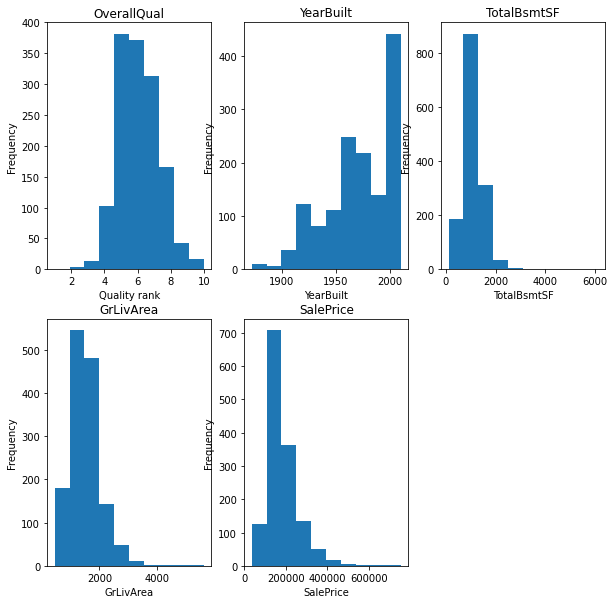

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(2, 3, 1)
ax1=df2["OverallQual"].plot(kind="hist", title="OverallQual")
ax1.set_xlabel("Quality rank")

ax2 = fig.add_subplot(2, 3, 2)
ax2=df2["YearBuilt"].plot(kind="hist", title="YearBuilt")
ax2.set_xlabel("YearBuilt")

ax3 = fig.add_subplot(2, 3, 3)
ax3=df2["TotalBsmtSF"].plot(kind="hist", title="TotalBsmtSF")
ax3.set_xlabel("TotalBsmtSF")

ax4 = fig.add_subplot(2, 3, 4)
ax4=df2["GrLivArea"].plot(kind="hist", title="GrLivArea")
ax4.set_xlabel("GrLivArea")

ax4 = fig.add_subplot(2, 3, 5)
ax5=df2["SalePrice"].plot(kind="hist", title="SalePrice")
ax5.set_xlabel("SalePrice")

Text(0.5, 0, 'TotalBsmtSF')

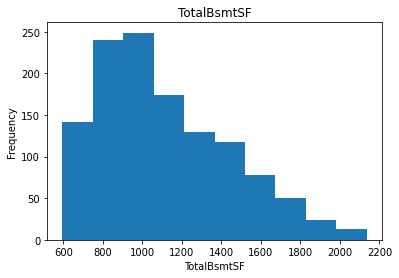

In [ ]:
#from the chart, we can tell there are some out liners in total Bsmt SF, Gr Liv Area and Salesprice.
# Find out the 1% percentile and the 99% percentile of Total Bsmt SF,Gr Liv Area and Salesprice.
lower_limit1 = df2['TotalBsmtSF'].quantile(0.05)
upper_limit1 = df2['TotalBsmtSF'].quantile(0.99)
lower_limit2 = df2['GrLivArea'].quantile(0.05)
upper_limit2 = df2['GrLivArea'].quantile(0.99)
lower_limit3 = df2['SalePrice'].quantile(0.05)
upper_limit3 = df2['SalePrice'].quantile(0.99)
filter = (df2['TotalBsmtSF'] > lower_limit1) &(df2['TotalBsmtSF'] < upper_limit1)&(df2['GrLivArea'] > lower_limit2) &(df2['GrLivArea'] < upper_limit2)&(df2['SalePrice'] > lower_limit3) &(df2['SalePrice'] < upper_limit3)
df3 = df2[filter]
ax3_1=df3["TotalBsmtSF"].plot(kind="hist", title="TotalBsmtSF")
ax3_1.set_xlabel("TotalBsmtSF")

# III: Bivariate analysis

Text(0.5, 0, 'Gr Liv Area vs SalePrice')

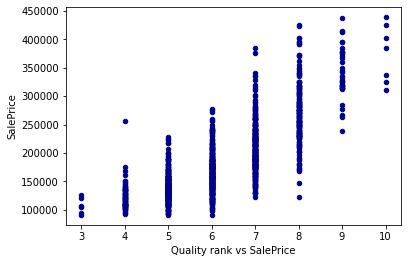

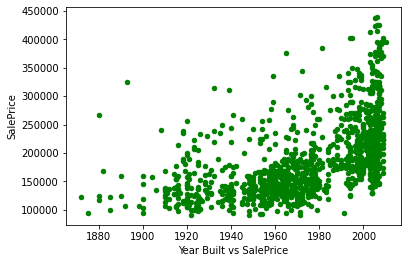

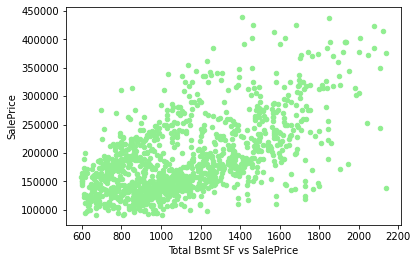

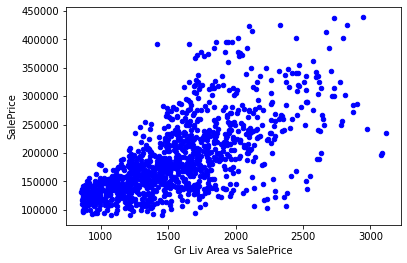

In [ ]:
#1 Scatter Plot :
ax1_1 = df3.plot.scatter(x='OverallQual',y='SalePrice', c='DarkBlue')
ax1_1.set_xlabel("Quality rank vs SalePrice")

ax2_1 = df3.plot.scatter(x='YearBuilt',
                      y='SalePrice',
                      c='Green')
ax2_1.set_xlabel("Year Built vs SalePrice")

ax3_1 = df3.plot.scatter(x='TotalBsmtSF',
                      y='SalePrice',
                      c='LightGreen')
ax3_1.set_xlabel("Total Bsmt SF vs SalePrice")

ax4_1 = df3.plot.scatter(x='GrLivArea',
                      y='SalePrice',
                      c='Blue')
ax4_1.set_xlabel("Gr Liv Area vs SalePrice")

In [ ]:
#Calculate the correlation coefficient
df3.corr()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,SalePrice
OverallQual,1.000000,0.571034,0.446350,0.528568,0.793064
YearBuilt,0.571034,1.000000,0.385618,0.147255,0.547077
TotalBsmtSF,0.446350,0.385618,1.000000,0.274971,0.583525
GrLivArea,0.528568,0.147255,0.274971,1.000000,0.664744
SalePrice,0.793064,0.547077,0.583525,0.664744,1.000000


From the scatter chat and correlation coefficient chart we can tell that all of other 4 features are positive corelated to the saleprice in different level. Overall, the Overall Quality has the strongest correlation with the sales price, which means the higher qualities is, the higer sales price wpuld be. Also, Year built has the weakest correlation with sale price among all those 4 features.

# IV. Identify additional relevant feature

In [ ]:
#1. Find features with high correlation: 
df4=df1.select_dtypes(include=['float', 'int'] )
print(df4.columns.values)
cor_saleprice=df4[df4.columns[1:]].corr()['SalePrice'][:].sort_values(ascending=False)
print(cor_saleprice.head(6))


['Id' 'MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold'
 'SalePrice']
SalePrice      1.000000
OverallQual    0.786765
GrLivArea      0.711080
GarageCars     0.641825
GarageArea     0.621095
1stFlrSF       0.614753
Name: SalePrice, dtype: float64


In [ ]:
#As we can see that other than the feature we had before, the feature with the strongest correlation with saleprice is 1stFlrSF, which is  0.614753

In [ ]:
#2. Feature engineering: 
#1) total area = total area above ground (“GrLivArea”) + total basement area (“TotalBsmtSF”)
#2) area per room = total area above ground (“GrLivArea”) / number of rooms (“TotRmsAbvGrd”).'''
df4['TotalArea']=df4['GrLivArea']+df4['TotalBsmtSF']
df4['AreaPerRoom']=df4['GrLivArea']/df4['TotRmsAbvGrd']
#print(df4.columns.values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
print(df4.head())

   Id  MSSubClass  LotFrontage  ...  SalePrice  TotalArea  AreaPerRoom
0   1          60         65.0  ...     208500       2566   213.750000
1   2          20         80.0  ...     181500       2524   210.333333
2   3          60         68.0  ...     223500       2706   297.666667
3   4          70         60.0  ...     140000       2473   245.285714
4   5          60         84.0  ...     250000       3343   244.222222

[5 rows x 40 columns]


#V. Prepare data for the k-Nearest-Neighbor method.

In [ ]:
df5=df4[["OverallQual","YearBuilt","TotalBsmtSF","GrLivArea",'TotalArea','1stFlrSF', 'AreaPerRoom',"SalePrice"]]
print(df5.head())
df5_std=df5.std()
print(df5_std)

   OverallQual  YearBuilt  TotalBsmtSF  ...  1stFlrSF  AreaPerRoom  SalePrice
0            7       2003          856  ...       856   213.750000     208500
1            6       1976         1262  ...      1262   210.333333     181500
2            7       2001          920  ...       920   297.666667     223500
3            7       1915          756  ...       961   245.285714     140000
4            8       2000         1145  ...      1145   244.222222     250000

[5 rows x 8 columns]
OverallQual        1.357655
YearBuilt         30.371732
TotalBsmtSF      404.766998
GrLivArea        526.846267
TotalArea        801.988200
1stFlrSF         385.285816
AreaPerRoom       44.673332
SalePrice      79270.416057
dtype: float64


#VI. Apply the kNN (k=5) method to predict the sale price of the first instance from the test set.

In [ ]:
df_test= pd.read_csv(r'/gdrive/My Drive/2021 GC/dm/homework2/test.csv')

df_test['TotalArea']=df_test['GrLivArea']+df_test['TotalBsmtSF']
df_test['AreaPerRoom']=df_test['GrLivArea']/df_test['TotRmsAbvGrd']
df_test1=df_test[["OverallQual","YearBuilt","TotalBsmtSF","GrLivArea",'1stFlrSF','TotalArea','AreaPerRoom',]].iloc[0:1, :]
print(df_test1)
df_test1["OverallQual"].loc[0]

   OverallQual  YearBuilt  TotalBsmtSF  ...  1stFlrSF  TotalArea  AreaPerRoom
0            5       1961        882.0  ...       896     1778.0        179.2

[1 rows x 7 columns]


5

In [ ]:
a=abs(df5["OverallQual"]-df_test1['OverallQual'].loc[0])/df5_std[0]
b=abs(df5["YearBuilt"]-df_test1['YearBuilt'].loc[0])/df5_std[1]
c=abs(df5["TotalBsmtSF"]-df_test1['TotalBsmtSF'].loc[0])/df5_std[2]
d=abs(df5["GrLivArea"]-df_test1['GrLivArea'].loc[0])/df5_std[3]
e=abs(df5["1stFlrSF"]-df_test1['1stFlrSF'].loc[0])/df5_std[4]
f=abs(df5["TotalArea"]-df_test1['TotalArea'].loc[0])/df5_std[5]
j=abs(df5["AreaPerRoom"]-df_test1['AreaPerRoom']).loc[0]/df5_std[6]
df5['Diff']=a+b+c+d+e+f+j
df5.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,TotalArea,1stFlrSF,AreaPerRoom,SalePrice,Diff
0,7,2003,856,1710,2566,856,213.750000,208500,7.333773
1,6,1976,1262,1262,2524,1262,210.333333,181500,6.029939
2,7,2001,920,1786,2706,920,297.666667,223500,7.785240
3,7,1915,756,1717,2473,961,245.285714,140000,7.515610
4,8,2000,1145,2198,3343,1145,244.222222,250000,11.760637


In [ ]:
df5_sorted=df5.sort_values(by=['Diff'],ascending=False)
df5_sorted.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,TotalArea,1stFlrSF,AreaPerRoom,SalePrice,Diff
1298,10,2008,6110,5642,11752,4692,470.166667,160000,58.548610
523,10,2007,3138,4676,7814,3138,425.090909,184750,37.180969
1182,10,1996,2396,4476,6872,2411,447.600000,745000,31.254584
691,10,1994,2444,4316,6760,2444,431.600000,755000,30.754080
496,8,1992,3200,3228,6428,3228,322.800000,430000,29.133596


In [ ]:
p_price=df5_sorted['SalePrice'].head(5).mean()
print('the perdiction of price is:',p_price)

the perdiction of price is: 454950.0
